# Import the nessary liberares  

In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay , classification_report , accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
import warnings


warnings.filterwarnings("ignore")

# Read the Data

In [148]:
# read the data 
df=pd.read_csv("/kaggle/input/healthcare-diabetes/Healthcare-Diabetes.csv")

# EDA

In [149]:
# print the first  10 rows in the data 
df.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [150]:
# print the last 10 rows in the data 
df.tail()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2763,2764,2,75,64,24,55,29.7,0.370,33,0
2764,2765,8,179,72,42,130,32.7,0.719,36,1
2765,2766,6,85,78,0,0,31.2,0.382,42,0
2766,2767,0,129,110,46,130,67.1,0.319,26,1
2767,2768,2,81,72,15,76,30.1,0.547,25,0


In [151]:
# print the shape of data
df.shape

(2768, 10)

In [152]:
# print the columns of the data 
df.columns.to_list()

['Id',
 'Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [153]:
# print information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB


In [154]:
# describe the columns in the data set 
df.describe()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,1384.500000,3.742775,121.102601,69.134393,20.824422,80.127890,32.137392,0.471193,33.132225,0.343931
std,799.197097,3.323801,32.036508,19.231438,16.059596,112.301933,8.076127,0.325669,11.777230,0.475104
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,692.750000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,1384.500000,3.000000,117.000000,72.000000,23.000000,37.000000,32.200000,0.375000,29.000000,0.000000
75%,2076.250000,6.000000,141.000000,80.000000,32.000000,130.000000,36.625000,0.624000,40.000000,1.000000
max,2768.000000,17.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000,81.000000,1.000000


<Axes: xlabel='Pregnancies'>

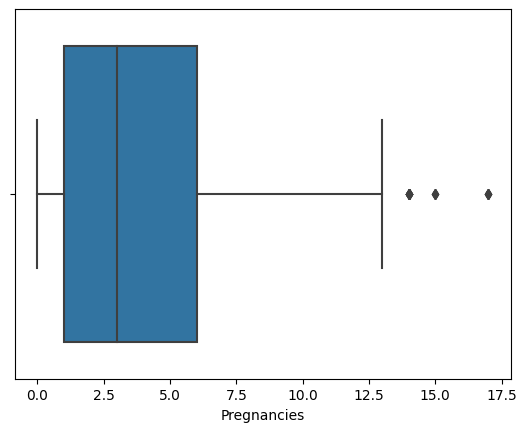

In [155]:
sns.boxplot(data=df, x = "Pregnancies")

<Axes: xlabel='Pregnancies', ylabel='Count'>

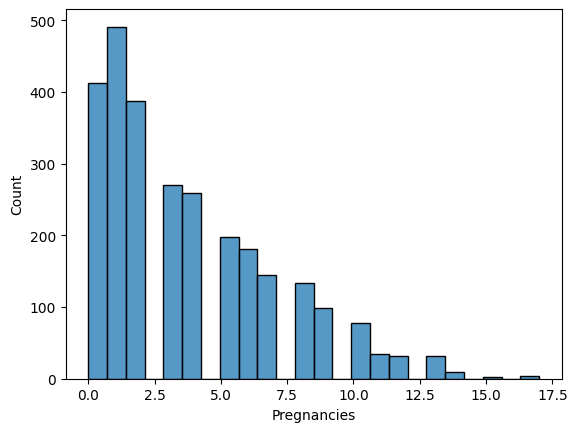

In [156]:
sns.histplot(data = df["Pregnancies"])

<Axes: xlabel='Glucose'>

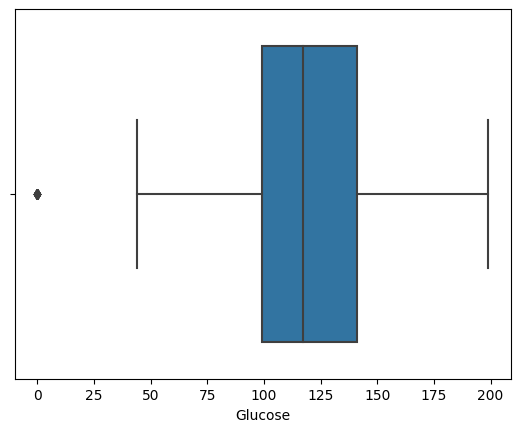

In [157]:
sns.boxplot(data=df, x = "Glucose")

<Axes: xlabel='Glucose', ylabel='Count'>

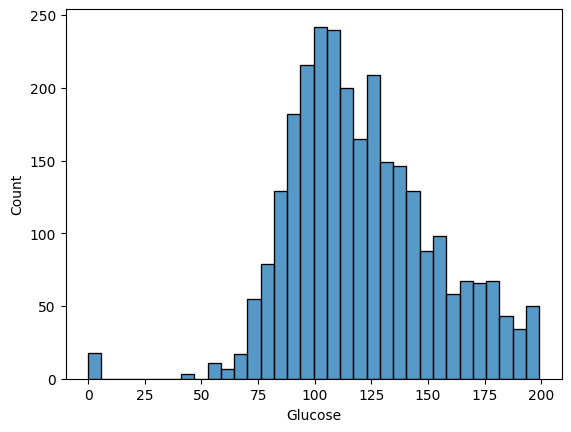

In [158]:
sns.histplot(data = df["Glucose"])

<Axes: xlabel='BloodPressure'>

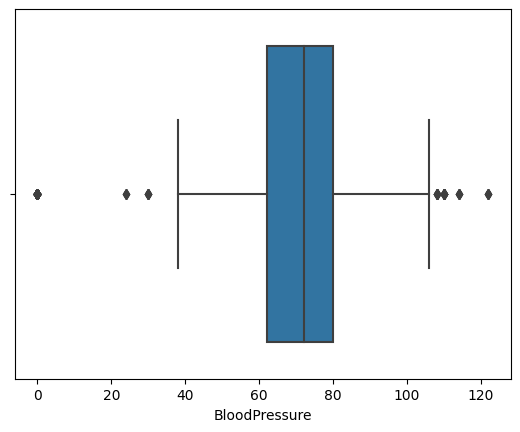

In [159]:
sns.boxplot(data=df, x = "BloodPressure")

<Axes: xlabel='BloodPressure', ylabel='Count'>

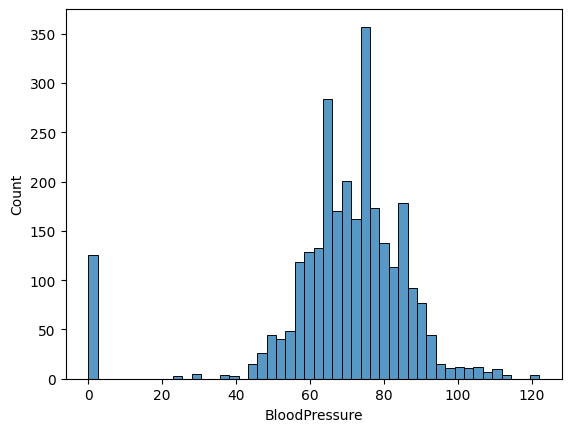

In [160]:
sns.histplot(data = df["BloodPressure"])

<Axes: xlabel='SkinThickness'>

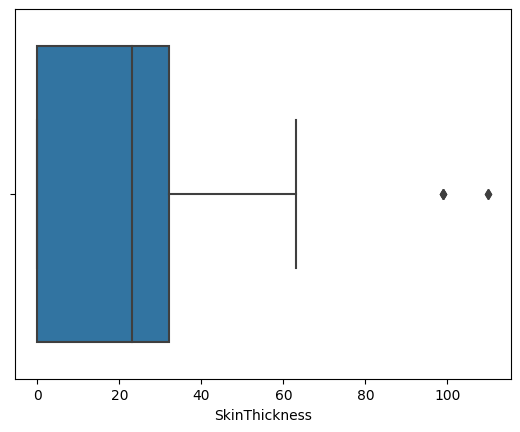

In [161]:
sns.boxplot(data=df, x = "SkinThickness")

<Axes: xlabel='SkinThickness', ylabel='Count'>

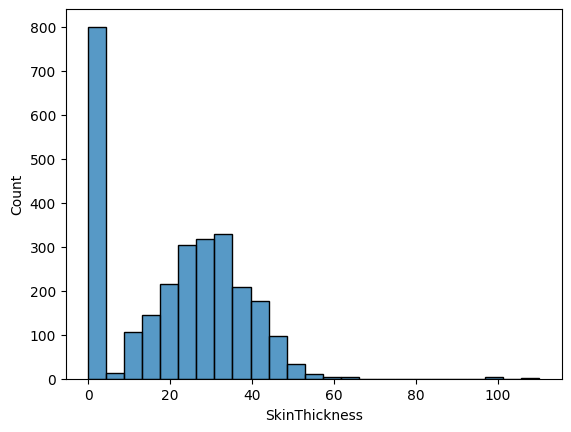

In [162]:
sns.histplot(data = df["SkinThickness"])

<Axes: xlabel='Insulin'>

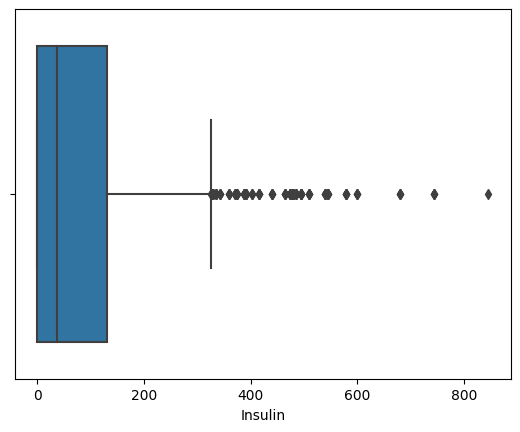

In [163]:
sns.boxplot(data=df, x = "Insulin")

<Axes: xlabel='Insulin', ylabel='Count'>

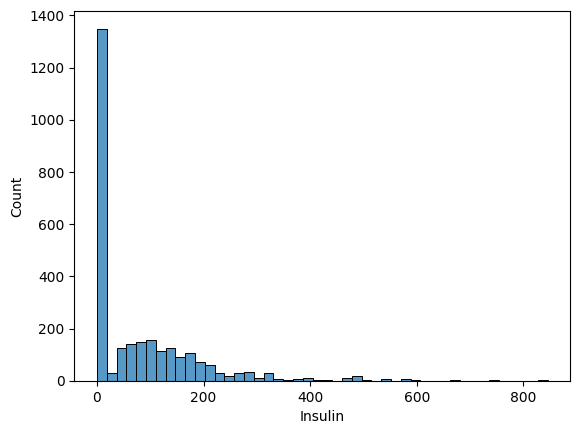

In [164]:
sns.histplot(data = df["Insulin"])

<Axes: xlabel='Age'>

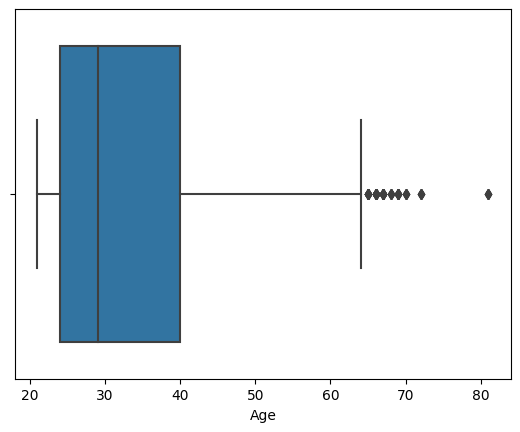

In [165]:
sns.boxplot(data=df, x = "Age")

<Axes: xlabel='Age', ylabel='Count'>

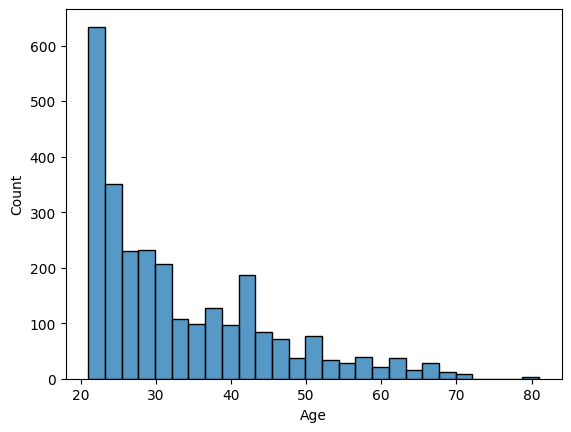

In [166]:
sns.histplot(data = df["Age"])

<Axes: xlabel='DiabetesPedigreeFunction'>

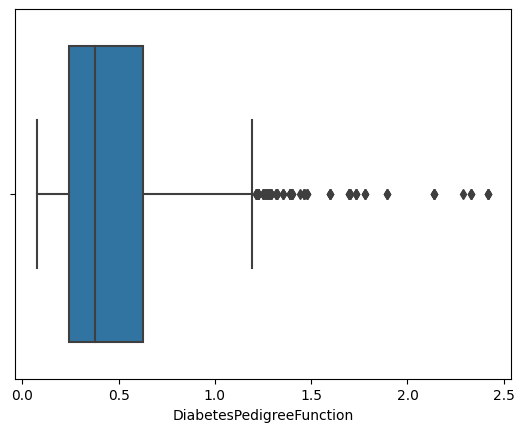

In [167]:
sns.boxplot(data=df, x = "DiabetesPedigreeFunction")

<Axes: xlabel='DiabetesPedigreeFunction', ylabel='Count'>

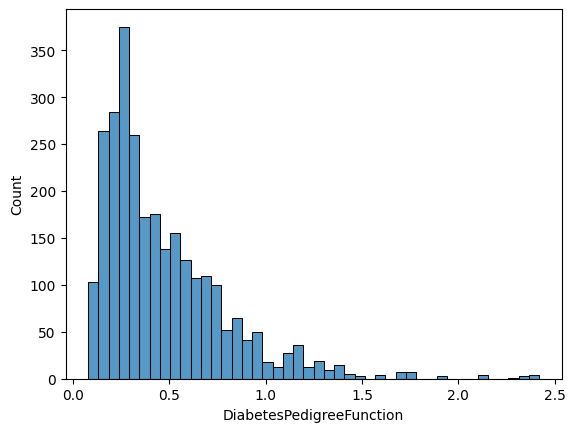

In [168]:
sns.histplot(data = df["DiabetesPedigreeFunction"])

<Axes: xlabel='BMI'>

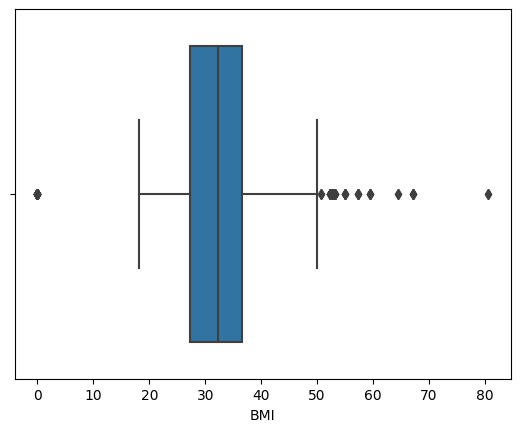

In [169]:
sns.boxplot(data=df, x = "BMI")

<Axes: xlabel='BMI', ylabel='Count'>

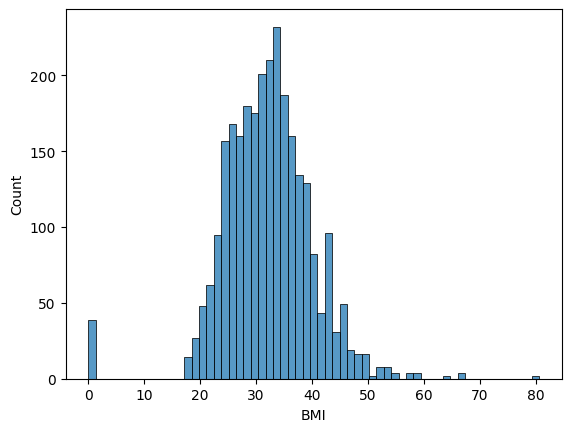

In [170]:
sns.histplot(data = df["BMI"])

In [171]:
df["Outcome"].value_counts()

Outcome
0    1816
1     952
Name: count, dtype: int64

<Axes: xlabel='Outcome', ylabel='count'>

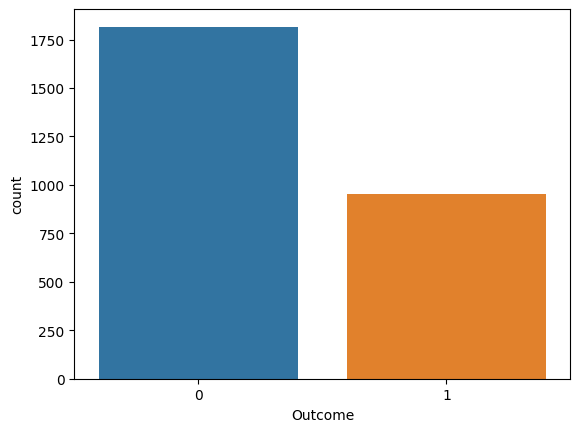

In [172]:
sns.countplot(data=df, x='Outcome')

In [173]:
df.columns

Index(['Id', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [174]:
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
for feature in features:
    print(feature)
    print(df[feature].skew())

Pregnancies
0.9590963213692726
Glucose
0.16286438598202155
BloodPressure
-1.8504500690128547
SkinThickness
0.18084092241732214
Insulin
2.078110809650225
BMI
-0.1765757093299158
DiabetesPedigreeFunction
1.8427906939007215
Age
1.1662989470696625


In [175]:
acc_baseline = df['Outcome'].value_counts(normalize= True).max()
print(f'Baseline Accuracy is {acc_baseline}')

Baseline Accuracy is 0.6560693641618497


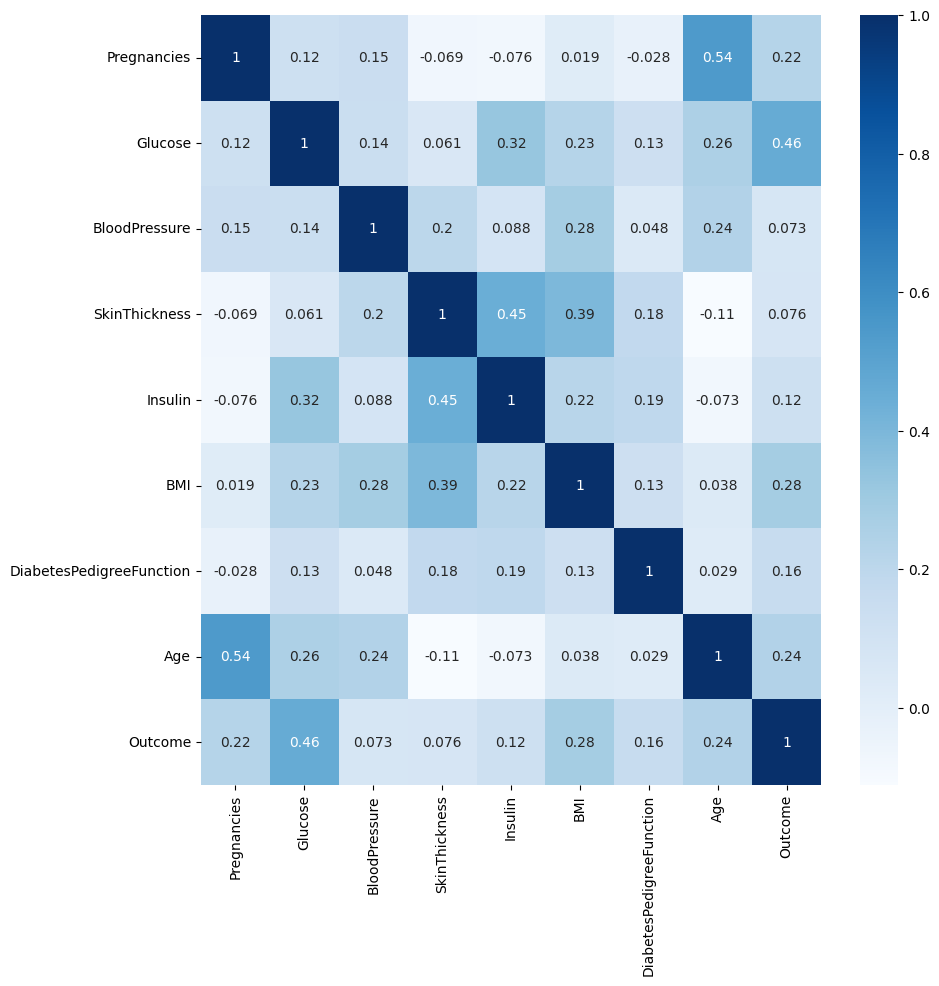

In [176]:
cor = df.drop(["Id"],axis=1).select_dtypes(include='number').copy()
corr = cor.corr()
fig , ax = plt.subplots(figsize=(10 , 10))
sns.heatmap(corr ,annot= True , ax=ax , cmap= 'Blues');

In [177]:
df.drop(["Id"],axis=1,inplace=True)

## Model before handleing outlier

In [178]:
x = df.drop(["Outcome"],axis=1)
y = df["Outcome"]

In [179]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.25,random_state=42,stratify = y)

In [180]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2076, 8)
(692, 8)
(2076,)
(692,)


In [181]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [182]:
print(lr.score(x_train,y_train))
print(lr.score(x_test,y_test))

0.7846820809248555
0.7557803468208093


In [206]:
features = x_test.columns
importances = lr.coef_[0]

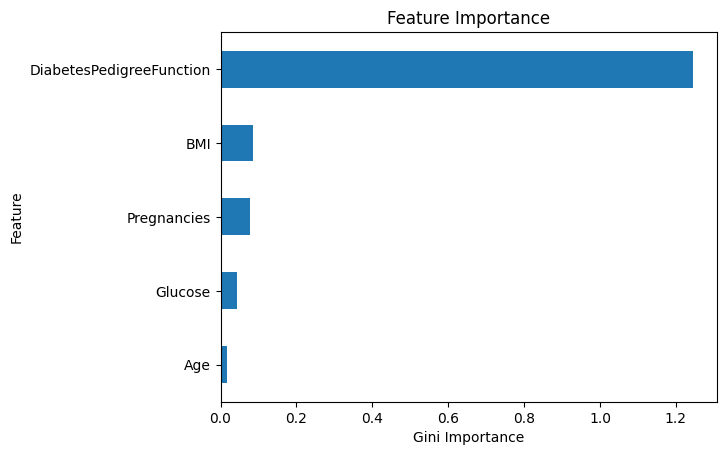

In [208]:
feat_imp = pd.Series(importances , index=features).sort_values()
feat_imp.tail().plot(kind= 'barh')
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Feature Importance");

In [183]:
lin = LinearRegression()
lin.fit(x_train,y_train)

LinearRegression()

In [184]:
print(lin.score(x_train,y_train))
print(lin.score(x_test,y_test))

0.2998074032252297
0.2630488528468087


In [185]:
kn = KNeighborsClassifier(n_neighbors=2)
kn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [186]:
print(kn.score(x_train,y_train))
print(kn.score(x_test,y_test))

0.9898843930635838
0.9450867052023122


In [215]:
from sklearn.inspection import permutation_importance

# Assuming kn is your trained KNeighborsClassifier model
result = permutation_importance(kn, x_test, y_test, n_repeats=10, random_state=42)
importances = result.importances_mean

# Match importances with feature names
feature_importance_dict = dict(zip(x_test.columns, importances))

# Sort feature importances
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Display feature importances
for feature, importance in sorted_feature_importance:
    print(f"Feature: {feature}, Importance: {importance}")

Feature: Glucose, Importance: 0.2586734693877551
Feature: Insulin, Importance: 0.19336734693877553
Feature: Age, Importance: 0.13350340136054423
Feature: SkinThickness, Importance: 0.11819727891156465
Feature: BloodPressure, Importance: 0.11598639455782314
Feature: BMI, Importance: 0.0447278911564626
Feature: Pregnancies, Importance: 0.0139455782312925
Feature: DiabetesPedigreeFunction, Importance: 0.0


## handling outliers

In [187]:
def outliers(df,ft):
    q1 = df[ft].quantile(0.25)
    q3 = df[ft].quantile(0.75)
    iqr = q3 - q1 
    
    lower_limit = q1 - iqr *1.5
    upper_limit = q3 + iqr *1.5
    
    ls = df.index[(df[ft]<lower_limit) | (df[ft]>upper_limit)]
    
    return ls

In [188]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [189]:
index_list = []
num = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction']
for feature in num:
    index_list.extend(outliers(df,feature))

In [190]:
def remove(df,ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

In [191]:
df = remove(df,index_list)

In [192]:
df.shape

(2351, 9)

<Axes: xlabel='DiabetesPedigreeFunction'>

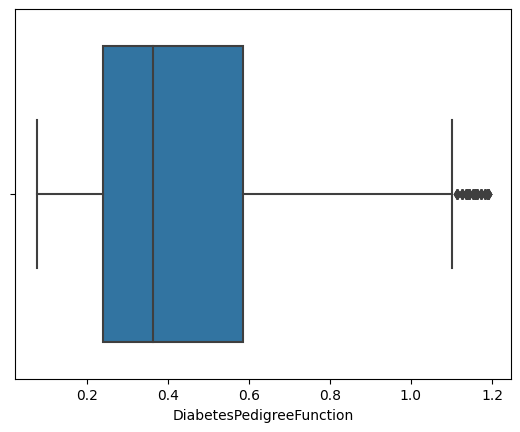

In [193]:
sns.boxplot(data=df, x = "DiabetesPedigreeFunction")

## model after hanling outliers

In [194]:
x = df.drop(["Outcome"],axis=1)
y = df["Outcome"]

In [195]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.25,random_state=42,stratify = y)

In [196]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1763, 8)
(588, 8)
(1763,)
(588,)


In [197]:
lr = LogisticRegression(max_iter=500)
lr.fit(x_train,y_train)

LogisticRegression(max_iter=500)

In [198]:
print(lr.score(x_train,y_train))
print(lr.score(x_test,y_test))

0.7918321043675554
0.782312925170068


In [199]:
lin = LinearRegression()
lin.fit(x_train,y_train)

LinearRegression()

In [200]:
print(lin.score(x_train,y_train))
print(lin.score(x_test,y_test))

0.327129368543679
0.25502611891941673


In [201]:
kn = KNeighborsClassifier(n_neighbors=2)
kn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [202]:
print(kn.score(x_train,y_train))
print(kn.score(x_test,y_test))

0.9920589903573455
0.9574829931972789
